<a href="https://colab.research.google.com/github/dhuMuhammadasif/test/blob/master/_22_2_23_hysteresis_Model_parameter_estimation_Least_square_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
'cd', '/content/drive/My Drive/'

('cd', '/content/drive/My Drive/')

In [3]:
import pandas as pd

In [4]:
#df =pd.read_excel('/My Drive/training data.xlsx')
df =pd.read_excel('/content/drive/My Drive/Data/training data.xlsx')

In [5]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 50.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


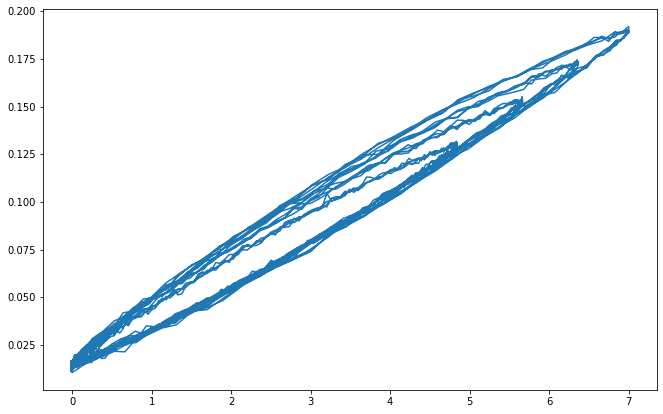

In [6]:
import numpy as np
import matplotlib.pyplot as plt
train_x = np.array(df['x'])
train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
plt.plot(train_x, train_y)
#plt.plot(val_x, val_y)

plt.show()

In [7]:
import scipy as sp
#import scipy.signal
import os
import numpy as np

In [8]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    
    return out

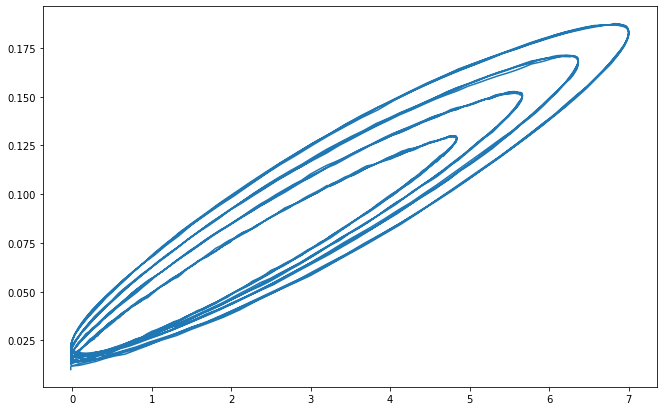

In [9]:
import numpy as np
train_x = np.array(df['x'])
#train_y=np.array(df['y'])
plt.figure(figsize=(11, 7))
#plt.plot(val_x, val_y)
train_y = ewma_vectorized(np.array(df['y']),11)
plt.plot(train_x, train_y)
plt.show()

# model parameter identification through least square method

In [ ]:
x=train_x
pl 

In [28]:
import numpy as np
from scipy.optimize import least_squares

# import some measured data for training
train_x = train_x
train_y = train_y

# Define the nonlinear function
def f(x, train_x):
    return (x[0]-x[1]*np.exp(-(train_x-7.0010375977)))*(train_x-7.0010375977)+x[2]*(0.9990890637103752)

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    return f(x, train_x) - train_y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))


x[0] = 0.0228, x[1] = -0.0000, x[2] = 0.1812


In [24]:
f_xp=1-np.exp(-(7.0010375977))
print(f_xp)

0.9990890637103752


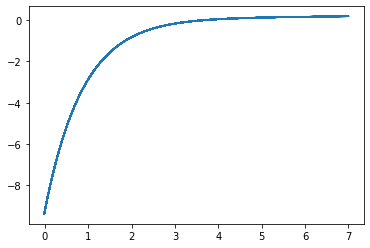

In [32]:
y_inc=( 0.0228+0.0012*np.exp(-(train_x-7.0010375977)))*(train_x-7.0010375977)+0.1812*(0.9990890637103752)
x_inc=train_x
plt.plot(x_inc, y_inc)
plt.show()


In [26]:
f_xp_dec=1-np.exp((0.016784668))
print(f_xp_dec)

-0.016926321968432356


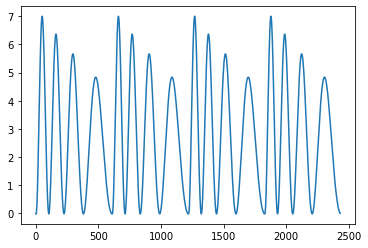

In [11]:
plt.plot(train_x)
plt.show()

In [30]:
import numpy as np
from scipy.optimize import least_squares

# import some measured data for training for minima
train_x = train_x
train_y = train_y

# Define the nonlinear function
def f(x, train_x):
    return (x[0]-x[1]*np.exp((train_x+0.016784668)))*(train_x+0.016784668)+x[2]*(-0.016926321968432356)

# Define the residual function for the optimization problem
def fun(x, train_x, train_y):
    return f(x, train_x) - train_y

# Initialize the parameter estimates
x0 = np.array([0, 0, 0])

# Call the least squares optimization function
res = least_squares(fun, x0, args=(train_x, train_y))

# Print the estimated parameter values
print("x[0] = {:.4f}, x[1] = {:.4f}, x[2] = {:.4f}".format(res.x[0], res.x[1], res.x[2]))
x[0] = 0.0228, x[1] = -0.0000, x[2] = 0.1812


x[0] = 0.0232, x[1] = -0.0000, x[2] = -1.1258


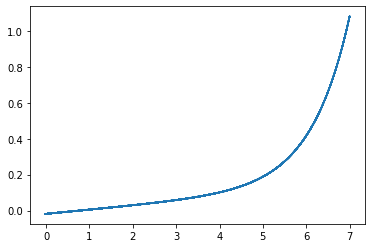

In [33]:
y_dec=(0.0232+0.00012*np.exp((train_x+0.016784668)))*(train_x+0.016784668)+1.1258*(-0.016926321968432356)
x_dec=train_x
plt.plot(x_dec, y_dec)
plt.show()

In [ ]:
import numpy as np
from scipy.signal import argrelextrema

# Generate some data
y = train_x

# Find the indices of the local maxima
maxima_indices = argrelextrema(y, np.greater)

# Get the values of the local maxima
maxima_values = y[maxima_indices]

# Print the indices and values of the local maxima
print("Indices of local maxima: ", maxima_indices)
print("Values of local maxima: ", maxima_values)


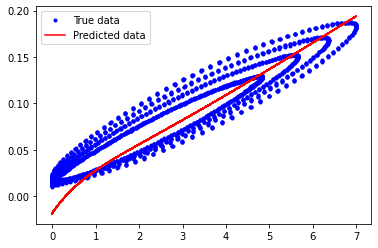

In [30]:
y_pred= f(res.x,train_x)
# Plot the true data and the predicted data
plt.plot(train_x, train_y, 'b.', label='True data')
plt.plot(train_x, y_pred, 'r-', label='Predicted data')
plt.legend()
plt.show()

# Finding Maxima and minima value from training data

In [36]:
import numpy as np

# Example time series data
time_series_data = train_x

# Use numpy to find the maxima
maxima_indices = np.argmax(time_series_data)
maxima_values = np.max(time_series_data)

# Print the maxima
print("Maxima indices:", maxima_indices)
print("Maxima values:", maxima_values)


Maxima indices: 51
Maxima values: 7.0010375977


In [12]:
import numpy as np

# Example time series data
time_series_data = train_x

# Use numpy to find the minima
minima_indices = np.argmin(time_series_data)
minima_values = np.min(time_series_data)

# Print the minima
print("Minima indices:", minima_indices)
print("Minima values:", minima_values)


Minima indices: 1218
Minima values: -0.016784668


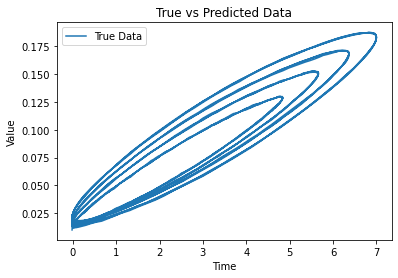

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# generate sample time series data
t = train_x
true_data = train_y
#predicted_data = np.sin(t) + np.random.normal(0, 0.1, len(t))  # add some noise to simulate predicted data
predicted_data=2.1341*np.exp((t-0.016784668))*(t-0.016784668)+0.5*(t-0.016784668)
# plot true data and predicted data
plt.plot(t, true_data, label='True Data')
#plt.plot(t, predicted_data, label='Predicted Data')

# set plot title and labels
plt.title('True vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')

# add legend and show plot
plt.legend()
plt.show()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize

# define dynamic hysteretic operator function
def dynamic_hysteresis_operator(X, Y, alpha, beta, gamma):
    if X >= Y:
        return alpha * Y + beta * X - gamma * Y * X
    else:
        return alpha * Y + beta * X + gamma * Y * X

# define Preisach model function
def preisach_model(X, Y, alpha, beta, gamma, delta):
    h = dynamic_hysteresis_operator(X, Y, alpha, beta, gamma)
    if h >= delta:
        return 1
    elif h <= -delta:
        return -1
    else:
        return Y

# load time series data
#data = pd.read_csv('data.csv')
    df =pd.read_excel('/content/drive/My Drive/Data/training data.xlsx')
  
# split data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2)

# define least squares function
def least_squares(params, X, Y):
    alpha, beta, gamma, delta = params
    predicted = []
    for i in range(len(X)):
        if i == 0:
            predicted.append(0)
        else:
            predicted.append(preisach_model(X[i], predicted[i-1], alpha, beta, gamma, delta))
       return self._engine.get_loc(casted_key)
    #return np.sum((predicted - Y) ** 2)

# set initial parameter values
init_params = [1, 1, 1, 1] 

# minimize the least squares function
result = minimize(least_squares, init_params, args=(train_data['x'], train_data['y']))

# extract the optimal parameter values
alpha_opt, beta_opt, gamma_opt, delta_opt = result.x

# predict the output values for the test set
y_predicted = []
y_actual = test_data['y'].tolist()
for i in range(len(test_data)):
    if i == 0:
        y_predicted.append(0)
    else:
        y_predicted.append(preisach_model(test_data['x'][i], y_predicted[i-1], alpha_opt, beta_opt, gamma_opt, delta_opt))

# plot the predicted values and the actual values
plt.plot(test_data['x'], y_actual, label='Actual')
plt.plot(test_data['x'], y_predicted, label='Predicted')
plt.xlabel('x')


IndentationError: ignored